# 7/3: EDA - plotting AQI value distros by state, testing against Benford's Law

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 999)

# Load past year's data

In [11]:
def get_data():
    #print('test')
    data = pd.read_csv('data.csv')
    #print(data.shape)
    data.drop(['Unnamed: 0'], axis=1, inplace = True)
    data['valid date'] = pd.to_datetime(data['valid date'])
    #print(data['valid date'].dtype)
    data['categorical'] = [1 if (cat == 'Good' or cat == 'Moderate') else 0 for cat in data['AQI category']]
    #drop rows where date does not exist in month
    data = data[data['state code'].isnull() == False]
    return(data)


In [3]:
data = get_data()

In [4]:
data[data['state code'] == '  '].head()    #international locations

,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
791,06/02/17,2017-06-01,NaN,IST,-1.0,Y,Y,Chennai,,13.0878,80.2785,PM2.5,66.0,Moderate,No,NaN,U.S. Department of State India - Chennai,20170601,1
792,06/02/17,2017-06-02,9:00,IST,0.0,O,Y,Chennai,,13.0878,80.2785,PM2.5,45.0,Good,No,NaN,U.S. Department of State India - Chennai,20170601,1
1180,06/02/17,2017-06-01,NaN,BST,-1.0,Y,Y,Dhaka,,23.7964,90.4246,PM2.5,103.0,Unhealthy for Sensitive Groups,No,NaN,U.S. Department of State Bangladesh - Dhaka,20170601,0
1181,06/02/17,2017-06-02,10:00,BST,0.0,O,Y,Dhaka,,23.7964,90.4246,PM2.5,92.0,Moderate,No,NaN,U.S. Department of State Bangladesh - Dhaka,20170601,1
1369,06/02/17,2017-06-01,NaN,NPT,-1.0,Y,Y,Embassy Kathmandu,,27.7387,85.3362,PM2.5,85.0,Moderate,No,NaN,U.S. Department of State Nepal - Kathmandu,20170601,1


# Benford's Law

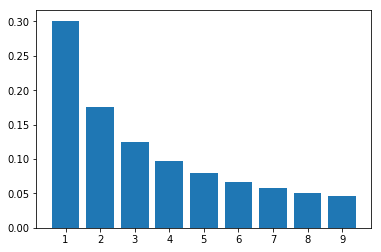

In [5]:
## Function to define Benford's law
def benford_prob(d):
    return np.log10(1+1/d)

digits = list(range(1, 10))
benford_expected = [benford_prob(d) for d in digits]

plt.bar(digits, benford_expected)
plt.xticks(digits);

In [6]:
data['first_digit'] = [str(value)[0] for value in data['AQI value'].values]

In [7]:
data['first_digit'].value_counts()

n    480508
3    287828
2    272011
4    265488
1    242374
5    163464
6     76465
7     43984
8     34050
9     24639
0      7090
Name: first_digit, dtype: int64

In [8]:
actuals = np.round(data['first_digit'].value_counts() / len(data), 2)
actuals = actuals.iloc[1:10].sort_index()
actuals

1    0.13
2    0.14
3    0.15
4    0.14
5    0.09
6    0.04
7    0.02
8    0.02
9    0.01
Name: first_digit, dtype: float64

# Countrywide AQI values distro against Benford's Law: Past 12mths data

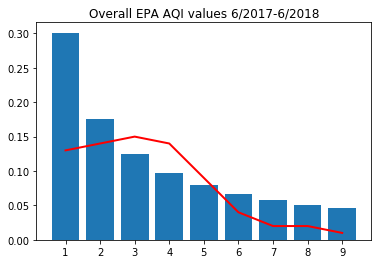

In [9]:
plt.bar(digits, benford_expected);
plt.plot(digits, actuals, color = 'r', lw = '2');
plt.xticks(digits);
plt.title('Overall EPA AQI values 6/2017-6/2018');

In [40]:
#checking data values for state code
len(data['state code'].unique())    #returns 54 unique values: MX, DC, PR, and '  ' denoting international
states = np.sort(data[(data['state code'] != '  ') & (data['state code'] != 'MX') & (data['state code'] != 'DC') & (data['state code'] != 'PR')]['state code'].unique())
len(states)

50

In [41]:
## Function for plotting Benford's law against observed AQI values in 50 states

def benford_plotter(states = states, data = data):
    fig = plt.figure(figsize = (15, 25))
    for i, state in enumerate(states):
        print(i, state)
        actuals = np.round(data[data['state code'] == state]['first_digit'].value_counts() / len(data[data['state code'] == state]), 2)
        actuals = actuals.loc[['1', '2', '3', '4', '5', '6', '7', '8', '9']]
        print(actuals)
    
        ax = fig.add_subplot(10, 5, i+1)
        ax.bar(digits, benford_expected)
        ax.plot(digits, actuals, color='r', marker='x', lw = '1.5')
        ax.set_title(state)

    plt.tight_layout()
    plt.show()


# State AQI values distro against Benford's Law: Past 12mths data

0 AK
1    0.31
2    0.16
3    0.12
4    0.06
5    0.07
6    0.07
7    0.05
8    0.04
9    0.04
Name: first_digit, dtype: float64
1 AL
1    0.11
2    0.15
3    0.21
4    0.23
5    0.14
6    0.05
7    0.02
8    0.01
9    0.01
Name: first_digit, dtype: float64
2 AR
1    0.05
2    0.16
3    0.28
4    0.23
5    0.12
6    0.05
7    0.01
8    0.01
9    0.00
Name: first_digit, dtype: float64
3 AZ
1    0.06
2    0.08
3    0.16
4    0.27
5    0.17
6    0.09
7    0.08
8    0.06
9    0.02
Name: first_digit, dtype: float64
4 CA
1    0.17
2    0.17
3    0.16
4    0.14
5    0.10
6    0.06
7    0.03
8    0.02
9    0.01
Name: first_digit, dtype: float64
5 CO
1    0.06
2    0.07
3    0.12
4    0.16
5    0.07
6    0.03
7    0.03
8    0.02
9    0.01
Name: first_digit, dtype: float64
6 CT
1    0.15
2    0.23
3    0.22
4    0.19
5    0.11
6    0.04
7    0.02
8    0.02
9    0.01
Name: first_digit, dtype: float64
7 DE
1    0.06
2    0.21
3    0.25
4    0.25
5    0.13
6    0.04
7    0.02
8    0.01
9    0.01
Na

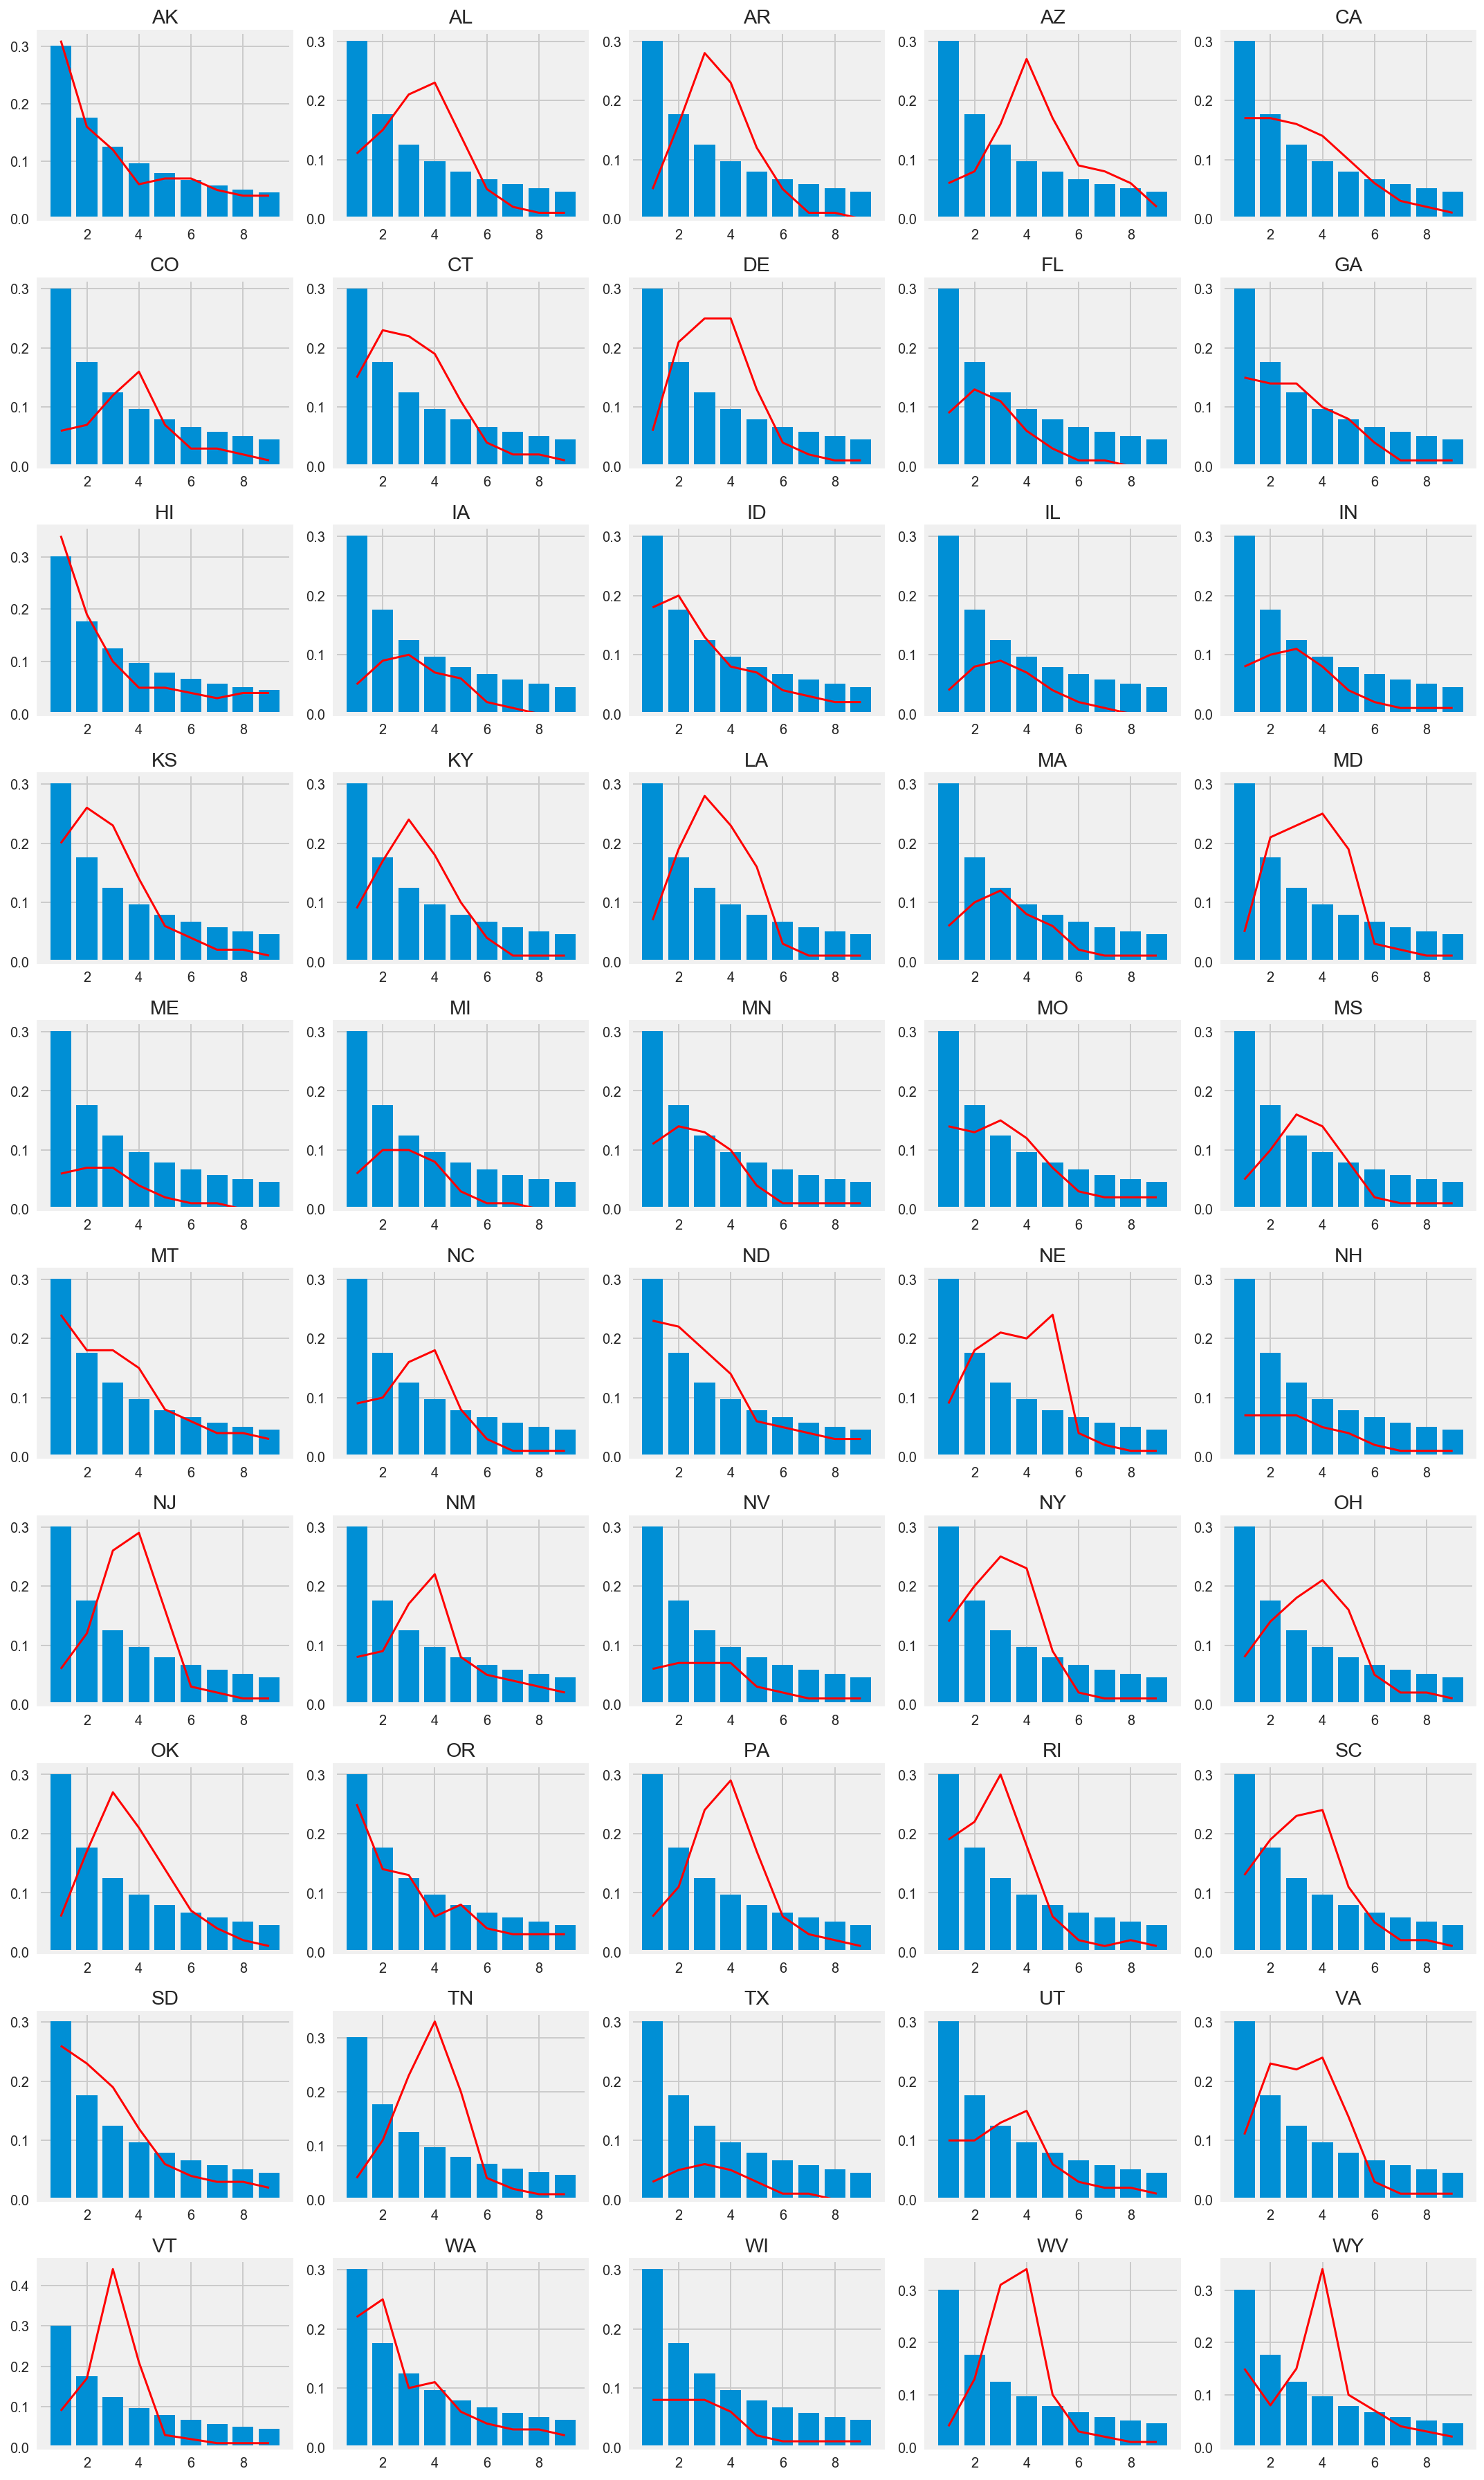

In [352]:
benford_plotter(states)    #HI, AK, OR AQI values tend : Past 12mths datato follow Benford's law

# International AQI values distro against Benford's Law: Past 12mths data

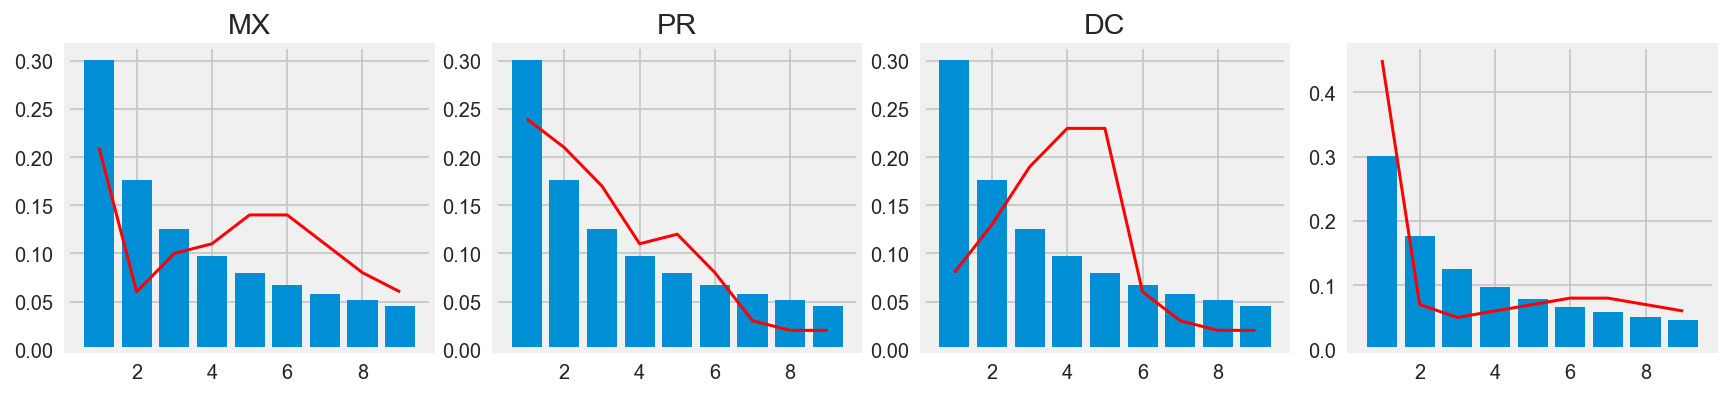

In [350]:
# plotting non-state values
benford_plotter(['MX', 'PR', 'DC', '  '])

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


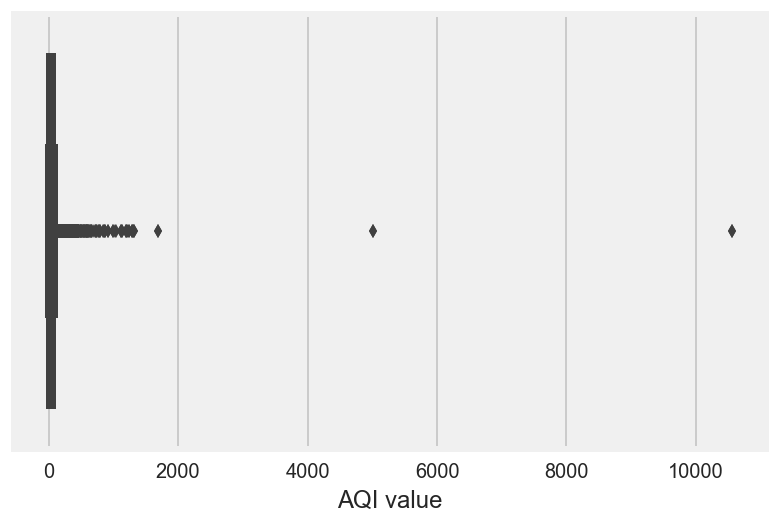

In [353]:
sns.boxplot(data['AQI value']);

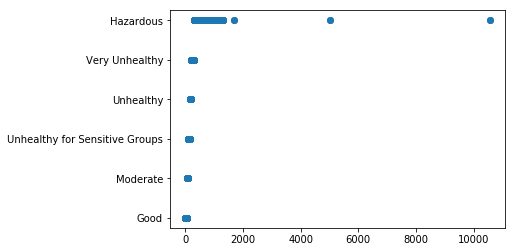

In [12]:
plt.scatter(data['AQI value'], data['AQI category']);

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


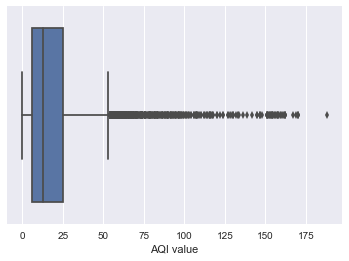

In [18]:
sns.boxplot(data[data['state code'] == 'AK']['AQI value']);

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


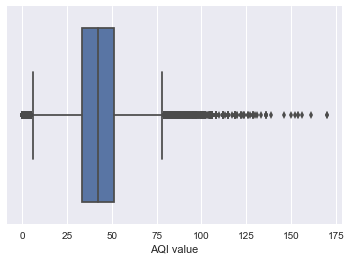

In [21]:
sns.boxplot(data[data['state code'] == 'PA']['AQI value']);

# Past 3 years' data

In [22]:
def get_data():
    #print('test')
    data = pd.read_csv('data2015_18.csv')
    #print(data.shape)
    data.drop(['Unnamed: 0'], axis=1, inplace = True)
    data['valid date'] = pd.to_datetime(data['valid date'])
    #print(data['valid date'].dtype)
    data['categorical'] = [1 if (cat == 'Good' or cat == 'Moderate') else 0 for cat in data['AQI category']]
    #drop rows where date does not exist in month
    data = data[data['state code'].isnull() == False]
    return(data)

In [23]:
data3=get_data()

In [31]:
def first_digit(data):
    data['first_digit'] = [str(value)[0] for value in data['AQI value'].values]
    actuals = np.round(data['first_digit'].value_counts() / len(data), 2)
    actuals = actuals.iloc[1:10].sort_index()
    return(actuals)

In [37]:
actuals=first_digit(data3)
actuals

1    0.13
2    0.16
3    0.15
4    0.13
5    0.08
6    0.04
7    0.02
8    0.02
9    0.01
Name: first_digit, dtype: float64

# Countrywide AQI values distro against Benford's Law: 2015-2018 data

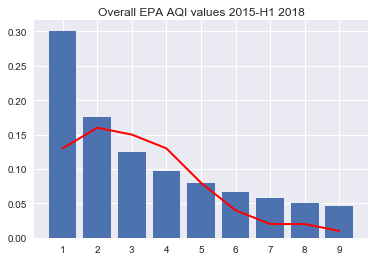

In [36]:
#plot overall data
plt.bar(digits, benford_expected);
plt.plot(digits, actuals, color = 'r', lw = '2');
plt.xticks(digits);
plt.title('Overall EPA AQI values 2015-H1 2018');

# State AQI values distro against Benford's Law: 2015-2018 data

0 AK
1    0.31
2    0.17
3    0.11
4    0.07
5    0.08
6    0.07
7    0.05
8    0.05
9    0.04
Name: first_digit, dtype: float64
1 AL
1    0.11
2    0.15
3    0.21
4    0.24
5    0.15
6    0.04
7    0.02
8    0.01
9    0.01
Name: first_digit, dtype: float64
2 AR
1    0.06
2    0.16
3    0.24
4    0.18
5    0.11
6    0.04
7    0.01
8    0.01
9    0.00
Name: first_digit, dtype: float64
3 AZ
1    0.07
2    0.11
3    0.20
4    0.28
5    0.15
6    0.07
7    0.06
8    0.04
9    0.02
Name: first_digit, dtype: float64
4 CA
1    0.17
2    0.18
3    0.15
4    0.13
5    0.09
6    0.05
7    0.02
8    0.02
9    0.01
Name: first_digit, dtype: float64
5 CO
1    0.07
2    0.09
3    0.13
4    0.15
5    0.05
6    0.03
7    0.02
8    0.02
9    0.01
Name: first_digit, dtype: float64
6 CT
1    0.14
2    0.22
3    0.23
4    0.18
5    0.11
6    0.04
7    0.02
8    0.02
9    0.02
Name: first_digit, dtype: float64
7 DE
1    0.07
2    0.20
3    0.23
4    0.23
5    0.15
6    0.05
7    0.03
8    0.02
9    0.01
Na

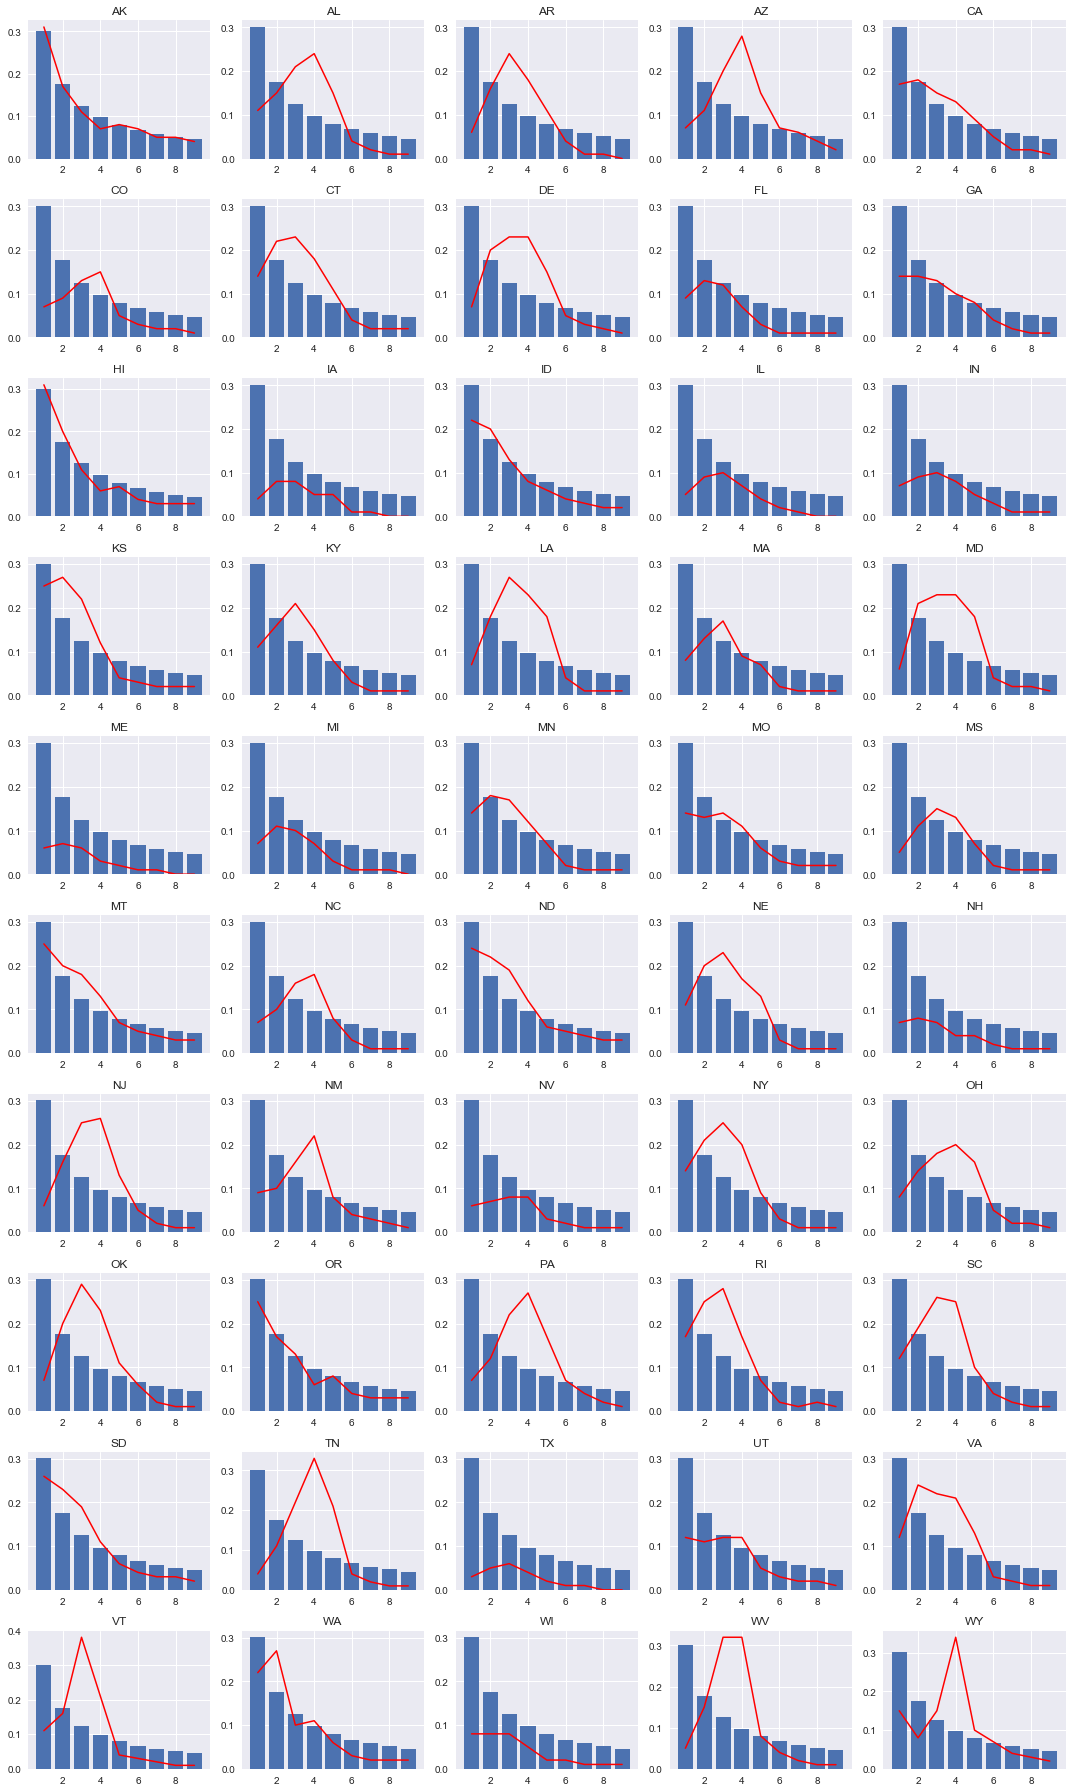

In [42]:
benford_plotter(states, data3)    #AK, HI, OR still follow Benford's law; anomalies in NE and WV